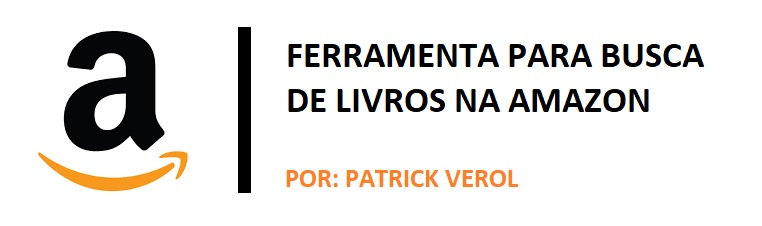

## Objetivo: 

- Criar um programa que automatize a busca de livros no site da Amazon a fim de coletar diversos dados sobre os livros, como título, autor, descrição, preço, link de compra, etc. E ao final exportar todos os dados para uma planilha em Excel.

## Descrição:

- A ideia deste projeto surgiu quando estava decidindo qual seria meu próximo livro a ser lido. Abri uma planilha de excel na qual eu anotava todas as indicações de livros que recebia, e percebi que haviam muitos nomes, mas nenhuma informação a mais para decidir qual seria o próximo livro, além de nem mesmo lembrar quando eu porquê eu havia anotado o nome de certos livros.<p><p>

- Sendo assim, eu buscava cada um deles na internet a fim de coletar informações sobre cada um, o que resultava em um trabalho árduo apenas para decidir o próximo livro a ser lido (e todos sabemos o quão importante é esta decisão, afinal, lemos poucos livros durante nossa vida dada a quantidade de livros existentes).<p><p>
    
- Foi assim que pensei em criar um código no Python para automatizar esse processo, e desta forma, eu poderia comparar os dados mais facilmente em uma planilha de excel.<p><p>

- As informações que eu decidi coletar foram, título, autor, preço, descrição, ano, número de páginas, estrelas, número de avaliações, link para compra.<p><p>
    
    - *Título:* Verificar se o livro selecionado foi o correto.<p><p>
    
    - *Autor:* Sempre gosto de ver o autor dos livros, pois quando gosto de algum livro, é provável que goste de outro do mesmo autor.<p><p>
        
    - *Descrição:* Será interessante ver sobre o que o livro se trata.<p><p>
        
    - *Ano:* Sempre dizem que os melhores livros são aqueles que vencem o tempo, sendo assim quanto mais o antigo o livro, melhor.<p><p>
        
    - *Número de páginas:* Talvez minha disposição de ler um livro de 100 páginas e outro de 700 seja diferente rs.<p><p>
        
    - *Estrelas e Número de avalições:* É bom saber a nota das pessoas que já leram, bem como a quantidade de pessoas que avaliaram, para verificar se esta nota é relevante.

## ETAPAS:

1. Importação
2. Definição da função de busca na Amazon
3. Realizar as pesquisas e armazenar os dados em um Dataframe
4. Analisando e tratando os resultados
5. Exportar o Dataframe para o Excel

## 1. Importação

In [2]:
# importação de bibliotecas

# Biblotecas para importar o ChromeDriver e verificar a versão
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Bibliotecas para utilizar os comandos Keys e By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

# Biblioteca para trabalhar a base de dados
import pandas as pd
import numpy as np

In [3]:
# importar/visualizar a base de dados
lista_livros = pd.read_excel("Lista_de_livros.xlsx")
display(lista_livros)

,Type,Name,Author,Status
0,Finanças,Warren Buffet e a análise de balanços,NaN,NaN
1,Auto-ajuda,Tribe of mentors,NaN,NaN
2,Auto-ajuda,Trabalho Organizado,Thais Godinho,NaN
3,Data Science,Todo mundo mente,Seth Stephens-Davidowitz,NaN
4,Auto-ajuda,Think again,Adam Grant,NaN
...,...,...,...,...
101,Auto-ajuda,10% mais feliz,NaN,Finished
102,História,1984,NaN,NaN
103,História,1889,NaN,NaN
104,História,1822,NaN,NaN


In [4]:
lista_livros.dtypes

Type      object
Name      object
Author    object
Status    object
dtype: object

In [5]:
# criar o navegador
servico = Service(ChromeDriverManager().install())
nav = webdriver.Chrome(service=servico)

# entrar na Amazon
nav.get("https://www.amazon.com.br/")



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/101.0.4951.41/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\PICHAU\.wdm\drivers\chromedriver\win32\101.0.4951.41]


## 2. Definição da função de busca na Amazon

In [6]:
def busca_amazon(nav, produto):

    import time
    
    # tratamento de erros
    # optei por utilizar um try para os casos de livros que são somente número, 
    # portanto, o atributo lower() não funcionaria
    try:
        produto = str(produto)
        produto = produto.lower()
    except:
        produto = produto
        
    lista_termos_produto = produto.split(' ')
    
    # pesquisar o nome do produto na Amazon
    nav.find_element(By.XPATH, '//*[@id="twotabsearchtextbox"]').send_keys(produto, Keys.ENTER)

    # pegar a lista de resultados da busca no google shopping
    lista_resultados = nav.find_elements(By.TAG_NAME, 'h2')

    # lista que a função vai me retornar como resposta
    lista_ofertas = []
    
    # Verificando o nome do livro e entrando no seu link correspondente
    for resultado in lista_resultados:

        elemento = resultado.find_element(By.TAG_NAME, 'span').text.lower()
        
        #verificando o nome e entrando na página do livro
        tem_todos_termos_produto = True
        for palavra in lista_termos_produto:
            if palavra not in elemento:
                tem_todos_termos_produto = False
                break
        
        if tem_todos_termos_produto == True:
            tag = resultado.find_element(By.TAG_NAME, 'a')
            link_livro = tag.get_attribute('href')
            time.sleep(0.5)
            nav.get(link_livro)
            
            time.sleep(1)
    
            # Dentro do link do livro, pegar os atributos

            # pegar o título
            try:
                titulo = nav.find_element(By.CLASS_NAME, 'a-size-extra-large')
                titulo = titulo.text
            except:
                titulo = ''

            # pegar o autor
            try:
                autor = nav.find_element(By.CLASS_NAME, 'contributorNameID')
                autor = autor.text
            except:
                autor = ''

            # pegar o preço
            try:
                preco = nav.find_element(By.CLASS_NAME, 'a-color-price')
                preco = preco.text
            except:
                preco = ''

            # pegar a descrição
            try:
                descricao = nav.find_element(By.CLASS_NAME, 'a-expander-partial-collapse-content')
                descricao = descricao.text
            except:
                descricao = ''

            # pegar a editora
            try:
                editora = nav.find_element(By.XPATH, '//*[@id="detailBullets_feature_div"]/ul/li[2]/span/span[2]').text
            except:
                editora = ''

            # pegar o número de páginas
            try:
                num_paginas = nav.find_element(By.XPATH, '//*[@id="detailBullets_feature_div"]/ul/li[4]/span/span[2]').text
            except:
                num_paginas = ''

            # estrelas
            try:
                time.sleep(2)
                estrelas = nav.find_element(By.ID, 'acrPopover')
                estrelas = estrelas.get_attribute('title')
            except:
                estrelas = ''

            # número de avaliações
            try:
                num_avaliacoes = nav.find_element(By.ID, 'acrCustomerReviewText')
                num_avaliacoes = num_avaliacoes.text
            except:
                num_avaliacoes = ''
        
            lista_ofertas.append((titulo, autor, preco, descricao, editora, num_paginas, estrelas, num_avaliacoes, link_livro))
            break
            
    voltar = nav.find_element(By.ID, 'nav-logo')
    voltar = voltar.find_element(By.TAG_NAME, 'a').get_attribute('href')
    time.sleep(1)
    nav.get(voltar)
    time.sleep(1)
    
    return lista_ofertas

## 3. Realizar as pesquisas e armazenar os dados em um Dataframe

In [8]:
tabela_amazon = pd.DataFrame()

for linha in lista_livros.index:
    
    # Rodando cada um dos itens da tabela de produtos
    livro = lista_livros.loc[linha, 'Name']
    
    # Realizando a pesquisa através da função e Criando a tabela de livros da Amazon
    lista_livros_resultado = busca_amazon(nav, livro)
    
    if lista_livros_resultado:
        resultado = pd.DataFrame(lista_livros_resultado, columns=['Title', 'Author', 'Price', 'Description', 'Editor', 'Number_of_pages', 'Rating','Number_of_reviews', 'Link'])
        tabela_amazon = tabela_amazon.append(resultado)
    else:
        resultado = None

display(tabela_amazon)

,Title,Author,Price,Description,Editor,Number_of_pages,Rating,Number_of_reviews,Link
0,Warren Buffett e a análise de balanços: Como i...,,"R$ 28,87",Como identificar empresas com vantagem competi...,Português,655564060X,"4,8 de 5 estrelas",1.398 avaliações de clientes,https://www.amazon.com.br/Warren-Buffett-an%C3...
0,Tribe of Mentors: Short Life Advice from the B...,Timothy Ferriss,"R$ 167,85","Tim Ferriss, the #1 New York Times best-sellin...",Inglês,1328994961,"4,6 de 5 estrelas",2.420 avaliações de clientes,https://www.amazon.com.br/Tribe-Mentors-Short-...
0,Trabalho Organizado: Encontre equilíbrio e sig...,Thais Godinho,"R$ 28,48",Aprenda aqui o passo a passo para viver uma vi...,Gente; 1ª edição (1 julho 2018),256 páginas,"4,7 de 5 estrelas",500 avaliações de clientes,https://www.amazon.com.br/Trabalho-Organizado-...
0,Todo mundo mente,Seth Stephens-Davidowitz,"R$ 56,01","Nesta obra ousada, Seth Stephens-Davidowitz, e...",Português,8550802174,"4,6 de 5 estrelas",429 avaliações de clientes,https://www.amazon.com.br/Todo-mundo-mente-Set...
0,Think Again: The Power of Knowing What You Don...,Adam Grant,"R$ 131,50","#1 New York Times Bestseller\n""THIS. This is t...",Inglês,1984878107,"4,6 de 5 estrelas",6.968 avaliações de clientes,https://www.amazon.com.br/Think-Again-Power-Kn...
...,...,...,...,...,...,...,...,...,...
0,10% mais feliz: Como aprendi a silenciar a men...,,"R$ 26,90","Dan Harris era um jornalista promissor, que co...",Português,8543102359,"4,7 de 5 estrelas",1.210 avaliações de clientes,https://www.amazon.com.br/10-Mais-Feliz-Harris...
0,George Orwell: 1984 + A revolução dos bichos: ...,George Orwell,"R$ 22,45",DOIS CLÁSSICOS DA LITERATURA MUNDIAL REUNIDOS ...,Português,6587885349,"4,8 de 5 estrelas",259 avaliações de clientes,https://www.amazon.com.br/gp/slredirect/picass...
0,"1889: Como um imperador cansado, um marechal v...",Laurentino Gomes,"R$ 31,36","Nas últimas semanas de 1889, a tripulação de u...",Português,8525054461,"4,8 de 5 estrelas",1.841 avaliações de clientes,https://www.amazon.com.br/1889-imperador-injus...
0,"1822: Como um homem sábio, uma princesa triste...",Laurentino Gomes,"R$ 31,41",Sucesso de Laurentino Gomes sobre a independên...,Português,852506064X,"4,8 de 5 estrelas",1.670 avaliações de clientes,https://www.amazon.com.br/1822-princesa-escoc%...


## 4. Analisando e tratando os resultados

In [4]:
print(tabela_amazon.dtypes)
print('-'*50)
print(tabela_amazon.isnull().sum())

Title                object
Author               object
Price                object
Description          object
Editor               object
Number_of_pages      object
Rating               object
Number_of_reviews    object
Link                 object
dtype: object
--------------------------------------------------
Title                 0
Author               38
Price                 2
Description           0
Editor                0
Number_of_pages       0
Rating                1
Number_of_reviews     1
Link                  0
dtype: int64


#### Title

- Alguns livros podem ter nomes muito parecidos, portanto o link pode estar errado, mas olhando a coluna dos nomes aparentemente não houveram problemas. Uma sugestão seria olhar cada um dos links depois.

#### Author

- Na coluna de autores, tiveram 38 não encontrados, cerca de 33%, o que pude percerber observando cada link dos livros, é que a parte do autor se alterava bastante no código html de cada página. Portanto, até que o resultado não foi tão ruim, já economizará um boa parte do tempo para procurar os demais.

#### Price

- No preço, apenas dois valores não encontrados, ótimo resultado. Apenas será feito um tratamento nos dados para transformá-los apenas em números e tipo float, pois ficará mais fácil trabalhar com os mesmos depois.

In [53]:
df = pd.DataFrame()

In [54]:
# Criando uma cópia
df = tabela_amazon
df

,Title,Author,Price,Description,Editor,Number_of_pages,Rating,Number_of_reviews,Link
0,Warren Buffett e a análise de balanços,NaN,"R$ 28,86",Como identificar empresas com vantagem competi...,Português,655564060X,"4,8 de 5 estrelas",1.396 avaliações de clientes,https://amzn.to/3LW2TOc
1,Tribe of Mentors: Short Life Advice from the B...,Timothy Ferriss,"R$ 167,85","Tim Ferriss, the #1 New York Times best-sellin...",Inglês,1328994961,"4,6 de 5 estrelas",2.417 avaliações de clientes,https://amzn.to/3LWr13g
2,Trabalho Organizado: Encontre equilíbrio e sig...,Thais Godinho,"R$ 28,48",Aprenda aqui o passo a passo para viver uma vi...,Gente; 1ª edição (1 julho 2018),256 páginas,"4,7 de 5 estrelas",498 avaliações de clientes,https://amzn.to/3vSEjYU
3,Todo mundo mente,Seth Stephens-Davidowitz,"R$ 52,41","Nesta obra ousada, Seth Stephens-Davidowitz, e...",Português,8550802174,"4,6 de 5 estrelas",421 avaliações de clientes,https://amzn.to/3MX3cZ5
4,Think Again: The Power of Knowing What You Don...,Adam Grant,"R$ 131,50","#1 New York Times Bestseller\n""THIS. This is t...",Inglês,1984878107,"4,6 de 5 estrelas",6.924 avaliações de clientes,https://amzn.to/3ygdbom
...,...,...,...,...,...,...,...,...,...
93,10% mais feliz,NaN,"R$ 27,85","Dan Harris era um jornalista promissor, que co...",Português,8543102359,"4,7 de 5 estrelas",1.209 avaliações de clientes,https://amzn.to/3P4XLta
94,George Orwell: 1984 + A revolução dos bichos: ...,George Orwell,"R$ 22,45",DOIS CLÁSSICOS DA LITERATURA MUNDIAL REUNIDOS ...,Português,6587885349,"4,7 de 5 estrelas",255 avaliações de clientes,https://amzn.to/3wvEEA3
95,"1889: Como um imperador cansado, um marechal v...",Laurentino Gomes,"R$ 31,36","Nas últimas semanas de 1889, a tripulação de u...",Português,8525054461,"4,8 de 5 estrelas",1.839 avaliações de clientes,https://amzn.to/3vUKQCx
96,"1822: Como um homem sábio, uma princesa triste...",Laurentino Gomes,"R$ 31,41",Sucesso de Laurentino Gomes sobre a independên...,Português,852506064X,"4,8 de 5 estrelas",1.666 avaliações de clientes,https://amzn.to/3M72ybi


In [55]:
df[['Price', 'drop']] = df['Price'].str.split('E', expand=True)

In [56]:
print(list(df['drop']))

[None, None, None, None, None, None, None, None, None, None, None, None, 'conomize\nR$ 17,79 (25%)', None, None, None, None, None, None, None, None, None, 'conomize\nR$ 43,84 (42%)', None, None, None, None, None, None, None, None, None, None, None, None, None, 'conomize\nR$ 45,94 (77%)', None, None, 'conomize\nR$ 25,51 (49%)', None, None, None, nan, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, nan, None, None, None, None, None, 'conomize\nR$ 46,79 (78%)', None, None, None, 'conomize\nR$ 0,69 (3%)', 'conomize\nR$ 19,79 (44%)', None, None, None, None, None, None, None, None, None, None, None, None, 'conomize\nR$ 17,02 (25%)', None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [57]:
df = df.drop(labels='drop', axis=1)
df.columns

Index(['Title', 'Author', 'Price', 'Description', 'Editor', 'Number_of_pages',
       'Rating', 'Number_of_reviews', 'Link'],
      dtype='object')

In [63]:
df['Price'] =  df['Price'].apply(lambda x: x.lstrip('R$ ').replace(',', '.'))

In [68]:
df['Price'] =  df['Price'].astype(np.float32)

In [71]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [72]:
df

,Title,Author,Price,Description,Editor,Number_of_pages,Rating,Number_of_reviews,Link
0,Warren Buffett e a análise de balanços,NaN,28.86,Como identificar empresas com vantagem competi...,Português,655564060X,"4,8 de 5 estrelas",1.396 avaliações de clientes,https://amzn.to/3LW2TOc
1,Tribe of Mentors: Short Life Advice from the B...,Timothy Ferriss,167.85,"Tim Ferriss, the #1 New York Times best-sellin...",Inglês,1328994961,"4,6 de 5 estrelas",2.417 avaliações de clientes,https://amzn.to/3LWr13g
2,Trabalho Organizado: Encontre equilíbrio e sig...,Thais Godinho,28.48,Aprenda aqui o passo a passo para viver uma vi...,Gente; 1ª edição (1 julho 2018),256 páginas,"4,7 de 5 estrelas",498 avaliações de clientes,https://amzn.to/3vSEjYU
3,Todo mundo mente,Seth Stephens-Davidowitz,52.41,"Nesta obra ousada, Seth Stephens-Davidowitz, e...",Português,8550802174,"4,6 de 5 estrelas",421 avaliações de clientes,https://amzn.to/3MX3cZ5
4,Think Again: The Power of Knowing What You Don...,Adam Grant,131.50,"#1 New York Times Bestseller\n""THIS. This is t...",Inglês,1984878107,"4,6 de 5 estrelas",6.924 avaliações de clientes,https://amzn.to/3ygdbom
...,...,...,...,...,...,...,...,...,...
93,10% mais feliz,NaN,27.85,"Dan Harris era um jornalista promissor, que co...",Português,8543102359,"4,7 de 5 estrelas",1.209 avaliações de clientes,https://amzn.to/3P4XLta
94,George Orwell: 1984 + A revolução dos bichos: ...,George Orwell,22.45,DOIS CLÁSSICOS DA LITERATURA MUNDIAL REUNIDOS ...,Português,6587885349,"4,7 de 5 estrelas",255 avaliações de clientes,https://amzn.to/3wvEEA3
95,"1889: Como um imperador cansado, um marechal v...",Laurentino Gomes,31.36,"Nas últimas semanas de 1889, a tripulação de u...",Português,8525054461,"4,8 de 5 estrelas",1.839 avaliações de clientes,https://amzn.to/3vUKQCx
96,"1822: Como um homem sábio, uma princesa triste...",Laurentino Gomes,31.41,Sucesso de Laurentino Gomes sobre a independên...,Português,852506064X,"4,8 de 5 estrelas",1.666 avaliações de clientes,https://amzn.to/3M72ybi


#### Description

- Analisando a descrição de cada um dos itens, apenas em alguns casos o resultado retorno foi outro texto da página sem ser a descrição. Portanto, não será feito nenhum tratamento.

#### Editor

- Quando pensei na coluna editora, estava buscando também o ano da publicação do livro (pois como dizem os melhores livros são aqueles que vencem no tempo, ou seja, quanto mais antigo melhor). Não encontrei essa informação em nenhum lugar da página, a que mais se assemelhava era a parte da editora que continha o ano, mas em muitos casos pelo que pude perceber, o ano mencionado é o da edição, e não o da primeira publicação. Portanto, desconsiderarei essa coluna.

In [73]:
df = df.drop(labels='Editor', axis=1)
df.columns

Index(['Title', 'Author', 'Price', 'Description', 'Number_of_pages', 'Rating',
       'Number_of_reviews', 'Link'],
      dtype='object')

#### Number_of_pages

- Quando pensei na coluna "Number_of_pages", estava olhando a página do livro "Rápido e devagar", com 608 páginas. Porém, aparentemente o código html muda para cada página do livro, e somente os livros "Trabalho organizado" e "Arriscando a própria pele", com 256 e 312 páginas respectivamente, tiveram o mesmo resultado. Portanto, também desconsiderarei essa coluna.<br><br>

- Uma outra solução seria verificar direto no código, se existe a palavra "páginas" no texto antes de armazená-lo.

In [105]:
tabela_amazon[tabela_amazon['Number_of_pages'].str.contains('páginas')]

,Title,Author,Price,Description,Editor,Number_of_pages,Rating,Number_of_reviews,Link
2,Trabalho Organizado: Encontre equilíbrio e sig...,Thais Godinho,"R$ 28,48",Aprenda aqui o passo a passo para viver uma vi...,Gente; 1ª edição (1 julho 2018),256 páginas,"4,7 de 5 estrelas",498 avaliações de clientes,https://amzn.to/3vSEjYU
15,Rápido e devagar,Daniel Kahneman,"R$ 59,99","Em Rápido e devagar: duas formas de pensar, Da...",Objetiva; 1ª edição (24 julho 2012),608 páginas,"4,7 de 5 estrelas",7.695 avaliações de clientes,https://amzn.to/38ZBaxo
76,Arriscando a própria pele: Assimetrias ocultas...,Nassim Nicholas Taleb,"R$ 35,87",Best-seller do New York Times. Do mesmo autor ...,Objetiva; 1ª edição (14 setembro 2018),312 páginas,"4,7 de 5 estrelas",2.350 avaliações de clientes,https://amzn.to/3LWsHK6


In [75]:
df = df.drop(labels='Number_of_pages', axis=1)
df.columns

Index(['Title', 'Author', 'Price', 'Description', 'Rating',
       'Number_of_reviews', 'Link'],
      dtype='object')

#### Rating

- A coluna "Rating" retornou apenas um valor vazio. Ao analisá-lo, percebe-se que o link se trata do resumo do livro, e não do livro original. Isso foi possível pois não o resumo também contém todas as palavras do título do livro, e caso o resumo apareça primeiro na pesquisa da Amazon, este será selecionado.<br><br>

- Uma solução para aprimoramento do programa será adicionar também uma verificação de termos banidos e incluir a palavra "resumo".

In [106]:
tabela_amazon[tabela_amazon['Rating'].isnull()]

,Title,Author,Price,Description,Editor,Number_of_pages,Rating,Number_of_reviews,Link
54,Resumo Estendido: Ferramentas Dos Titãs (Tools...,Mentors Library,"R$ 24,90",RESUMO ESTENDIDO: FERRAMENTAS DOS TITÃS (TOOLS...,Mentors Library (19 outubro 2020),272 KB,NaN,NaN,https://amzn.to/3kNoU5V


- Como sabe-se que que o máximo é 5 estrelas, não é necessário deixar todo o texto, apenas o primeiro número.

In [84]:
df[['Rating', 'drop']] = df['Rating'].str.split(' de', expand=True)
df

,Title,Author,Price,Description,Rating,Number_of_reviews,Link,drop
0,Warren Buffett e a análise de balanços,NaN,28.86,Como identificar empresas com vantagem competi...,"4,8",1.396 avaliações de clientes,https://amzn.to/3LW2TOc,5 estrelas
1,Tribe of Mentors: Short Life Advice from the B...,Timothy Ferriss,167.85,"Tim Ferriss, the #1 New York Times best-sellin...","4,6",2.417 avaliações de clientes,https://amzn.to/3LWr13g,5 estrelas
2,Trabalho Organizado: Encontre equilíbrio e sig...,Thais Godinho,28.48,Aprenda aqui o passo a passo para viver uma vi...,"4,7",498 avaliações de clientes,https://amzn.to/3vSEjYU,5 estrelas
3,Todo mundo mente,Seth Stephens-Davidowitz,52.41,"Nesta obra ousada, Seth Stephens-Davidowitz, e...","4,6",421 avaliações de clientes,https://amzn.to/3MX3cZ5,5 estrelas
4,Think Again: The Power of Knowing What You Don...,Adam Grant,131.50,"#1 New York Times Bestseller\n""THIS. This is t...","4,6",6.924 avaliações de clientes,https://amzn.to/3ygdbom,5 estrelas
...,...,...,...,...,...,...,...,...
93,10% mais feliz,NaN,27.85,"Dan Harris era um jornalista promissor, que co...","4,7",1.209 avaliações de clientes,https://amzn.to/3P4XLta,5 estrelas
94,George Orwell: 1984 + A revolução dos bichos: ...,George Orwell,22.45,DOIS CLÁSSICOS DA LITERATURA MUNDIAL REUNIDOS ...,"4,7",255 avaliações de clientes,https://amzn.to/3wvEEA3,5 estrelas
95,"1889: Como um imperador cansado, um marechal v...",Laurentino Gomes,31.36,"Nas últimas semanas de 1889, a tripulação de u...","4,8",1.839 avaliações de clientes,https://amzn.to/3vUKQCx,5 estrelas
96,"1822: Como um homem sábio, uma princesa triste...",Laurentino Gomes,31.41,Sucesso de Laurentino Gomes sobre a independên...,"4,8",1.666 avaliações de clientes,https://amzn.to/3M72ybi,5 estrelas


In [85]:
df = df.drop(labels='drop', axis=1)
df.columns

Index(['Title', 'Author', 'Price', 'Description', 'Rating',
       'Number_of_reviews', 'Link'],
      dtype='object')

In [106]:
df['Rating'] = df['Rating'].str.replace(',', '.')

In [108]:
df['Rating'] =  df['Rating'].astype(np.float32)

In [109]:
df.dtypes

Title                 object
Author                object
Price                float32
Description           object
Rating               float32
Number_of_reviews     object
Link                  object
dtype: object

#### Number_of_reviews

- Assim como a coluna ratings, o valor faltante da coluna Number_of_reviews foi o livro resumo, o qual pode ser corrigido incluindo uma lista de termos banidos com a palavra "resumo".
- Irei remover o texto "avaliações de clientes" para facilitar a filtragem da planilha posteriormente.

In [96]:
df['Number_of_reviews'] = df['Number_of_reviews'].str.rstrip(' avaliações de clientes')
df

,Title,Author,Price,Description,Rating,Number_of_reviews,Link
0,Warren Buffett e a análise de balanços,NaN,28.86,Como identificar empresas com vantagem competi...,"4,8",1.396,https://amzn.to/3LW2TOc
1,Tribe of Mentors: Short Life Advice from the B...,Timothy Ferriss,167.85,"Tim Ferriss, the #1 New York Times best-sellin...","4,6",2.417,https://amzn.to/3LWr13g
2,Trabalho Organizado: Encontre equilíbrio e sig...,Thais Godinho,28.48,Aprenda aqui o passo a passo para viver uma vi...,"4,7",498,https://amzn.to/3vSEjYU
3,Todo mundo mente,Seth Stephens-Davidowitz,52.41,"Nesta obra ousada, Seth Stephens-Davidowitz, e...","4,6",421,https://amzn.to/3MX3cZ5
4,Think Again: The Power of Knowing What You Don...,Adam Grant,131.50,"#1 New York Times Bestseller\n""THIS. This is t...","4,6",6.924,https://amzn.to/3ygdbom
...,...,...,...,...,...,...,...
93,10% mais feliz,NaN,27.85,"Dan Harris era um jornalista promissor, que co...","4,7",1.209,https://amzn.to/3P4XLta
94,George Orwell: 1984 + A revolução dos bichos: ...,George Orwell,22.45,DOIS CLÁSSICOS DA LITERATURA MUNDIAL REUNIDOS ...,"4,7",255,https://amzn.to/3wvEEA3
95,"1889: Como um imperador cansado, um marechal v...",Laurentino Gomes,31.36,"Nas últimas semanas de 1889, a tripulação de u...","4,8",1.839,https://amzn.to/3vUKQCx
96,"1822: Como um homem sábio, uma princesa triste...",Laurentino Gomes,31.41,Sucesso de Laurentino Gomes sobre a independên...,"4,8",1.666,https://amzn.to/3M72ybi


In [103]:
df['Number_of_reviews'] = df['Number_of_reviews'].str.replace(',', '')

## 5. Exportar o Dataframe para o Excel

In [10]:
# exportar para excel
df.to_excel("Tabela_Amazon.xlsx", index=False)